# Tweets Collector

Use this notebook to collect the tweets from Twitter. There are three main data collection capabilities provided here.

1. Collect tweets of individual users (requires Twitter API)

2. Collect tweets containing keywords (requires Twitter API)

3. Collect the following or followers of a user (requires a Twitter account).


You can obtain a Twitter account and a Twitter API account here:

1. Twitter account: https://twitter.com/i/flow/signup

2. Twitter API account:  https://developer.twitter.com/en/apply-for-access (you need a normal Twitter account first)

Once you have a Twitter API account, create an app.  This will provide you with the keys and tokens to connect to the API.


## Modify configuration file

All of your Twitter API tokens and keys, and Twitter screen name and password are stored in a file called *scripts/config_{your_name}.py*.  We give you a template file called *scripts/config.py* in the repo.  Change the name of this file to *scripts/config_{your_name}.py*, as we do with homework files.  Then put your Chrome driver path, Twitter username and password, along with your Twiiter API credentials are in the *scripts/config_{your_name}.py* file.  

You can find the API credentials for your Twitter API account here: https://developer.twitter.com/en/apps.  Click on *Details* for your app, and then *Keys and Tokens*. 

The Twitter API credentials are called

1. `APP_KEY`

2. `APP_SECRET`

3. `OAUTH_TOKEN`

4. `OAUTH_TOKEN_SECRET`

The Twitter login info is called

1. `USER`

2. `PASSWORD`

The Chrome drive path is called

1. `DRIVER_PATH`

I recommend the `DRIVER_PATH` be something like `DRIVER_PATH = 'scripts/chromedriver_win32/chromedriver.exe'`  Basically, create a folder in the *scripts* folder and put the drive .exe file in there.

## Install packages

We will need:
1. `twython` - this package lets you connect to the Twitter API. 

2. `selenium` - this package lets you crawl websites.

3. `chromedriver_autoinstaller` - this package installs the chrome driver you download.

4. Chrome driver - this is a software that lets us do the webcrawling with `selenium`. You have to download a Chrome driver from https://chromedriver.chromium.org/downloads.  Check to make sure your driver matches your version of Chrome.

In [ ]:
!pip install twython --upgrade --user
!pip install selenium --upgrade --user
!pip install chromedriver_autoinstaller --upgrade --user

#You need to download your chrome driver too

## Import packages

We will import the packages we installed, along with some helper functions.

In [1]:
from twython import Twython
from datetime import datetime, timedelta
import numpy as np
import sqlite3, sys, os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import codecs  #this let's us display tweets properly (emojis, etc.)

#helper code
import scripts.scraper_twitter_api as api


#### Import configuration file

Import your modified configuration file with the code `from scripts.config_{your_name} import *`

In [2]:
from scripts.config_lmdisch import *


# Collect a User's Tweets with the Twitter API
This section provides you code to collect the tweets of a user, or a list of users

#### Connect to Twitter API

First we create `twitter` which is a `Twython` object that connects us to the Twitter API.  



In [3]:
twitter = Twython(APP_KEY, APP_SECRET,OAUTH_TOKEN, OAUTH_TOKEN_SECRET);
print("Connection made to Twitter API for "+twitter.verify_credentials()['screen_name'])
print(f"type(twitter)= {type(twitter)}")

Connection made to Twitter API for lmdisch
type(twitter)= <class 'twython.api.Twython'>


#### Select screen names

Create a list `screen_names` that contains all the screen names of Twitter users whose tweets you want to collect.  The tweets will be saved to a database file.  If you have already have a database file that exists, you can add the new data to the existing database.

In [4]:
screen_names = ["kanyewest","Adele",'djkhaled']

#### Collect the tweets for each screen name

The `for` loop will go through each `screen_name` in `screen_names`, collect the tweets using the `user_tweets` function, and saves the tweets to a database with filename given by `fname`.

You can run this code again later with different users and they will be added to the same database.

In [5]:
fname = f"data/tweets_users.db"
for screen_name in screen_names:    
    df1 = api.user_tweets(twitter,screen_name,fname)

Tweets of kanyewest will be saved to database data/tweets_users.db
1868 tweets in database
Tweets of Adele will be saved to database data/tweets_users.db
2180 tweets in database
Tweets of djkhaled will be saved to database data/tweets_users.db
5354 tweets in database


#### Load database into a dataframe

We create a connection `conn` to the database and then load the data into a dataframe `df` with the `read_sql_query` function.

In [6]:
conn = sqlite3.connect(fname)
df = pd.read_sql_query("SELECT * FROM tweet", conn)

print(f"df has {len(df)} rows")
print(df.screen_name.unique())
print(df.columns)

df has 5354 rows
['kanyewest' 'Adele' 'djkhaled']
Index(['tweet_id', 'user_id', 'screen_name', 'created_at', 'text', 'geo_lat',
       'geo_long', 'place_type', 'place_name', 'lang', 'source',
       'retweet_count', 'favorite_count', 'retweet_status_id',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name'],
      dtype='object')


#### Look at mean retweet count per user

For fun, why don't we look at the mean retweet counts per user.  We can use the `groupby` function for this.

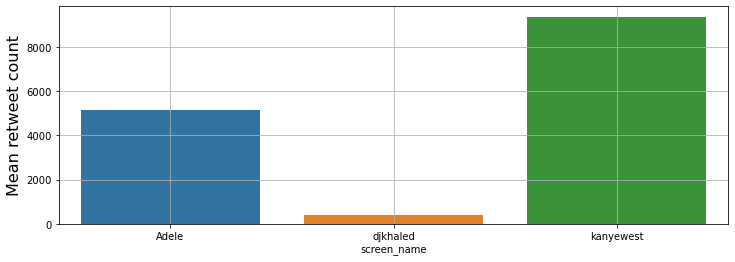

In [7]:
fig = plt.figure(figsize = (12,4))

df_plot = df.groupby(by = ['screen_name']).mean()
df_plot['screen_name'] = df_plot.index
sns.barplot(data = df_plot, x = 'screen_name', y='retweet_count')
plt.ylabel("Mean retweet count",fontsize = 16)
plt.grid()

# Collect Tweets by Keyword with the Twitter API

Next we will provide code to collect tweets that contain a keyword, or one of many in a set of keywords.

#### Connect to Twitter API

In [8]:
twitter = Twython(APP_KEY, APP_SECRET,OAUTH_TOKEN, OAUTH_TOKEN_SECRET);
print("Connection made to Twitter API for "+twitter.verify_credentials()['screen_name'])


Connection made to Twitter API for lmdisch


#### Create list of query keywords

Create a list `keywords` that has all the words you want to search for.

In [9]:
keywords = ['doge','dogecoin','dogearmy']

#### Collect tweets for each keyword

The tweets will be saved in a database file with name given by `fname`.  If you run this cell again with the same filename, new tweets will be added to the database.

In [10]:
fname = f"data/tweets_keyword_doge.db"
max_tweets = 100
df = api.keyword_tweets(twitter ,keywords,fname,max_tweets = max_tweets)

Tweets will be saved to database data/tweets_keyword_doge.db
Querying keyword  doge
Insterting final batch of tweets. got  100  to insert
Querying keyword  dogecoin
Insterting final batch of tweets. got  100  to insert
Querying keyword  dogearmy
Insterting final batch of tweets. got  100  to insert
266 tweets in database


#### Load database into a dataframe

We create a connection `conn` to the database and then load the data into a dataframe with the `read_sql_query` function.

In [11]:
conn = sqlite3.connect(fname)
df = pd.read_sql_query("SELECT * FROM tweet", conn)

print(f"df has {len(df)} rows")
print(f"df has columns {df.columns}")

df has 266 rows
df has columns Index(['tweet_id', 'user_id', 'screen_name', 'created_at', 'text', 'geo_lat',
       'geo_long', 'place_type', 'place_name', 'lang', 'source',
       'retweet_count', 'favorite_count', 'retweet_status_id',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name'],
      dtype='object')


#### Look at top retweeted tweets

For fun, let's print out the top retweeted tweets.

In [12]:
ndisplay = 10
c = 0
for index, row in df.sort_values(by = ['retweet_count'],ascending = False).iterrows():
    c+=1
    text = codecs.decode(row.text, 'unicode_escape')
    print(f"{row.retweet_count} retweets: @{row.screen_name}: {text}")
    if c>=ndisplay:break

5565 retweets: @AkhenatenFTW: RT @WSBChairman: Has Doge ever been to a dollar? 
851 retweets: @cryptokid334: RT @DogeDYou: What happens if everyone sells their Doge on Robinhood and buys it somewhere else? Will this change their wallet distribution… 
481 retweets: @cryptokid334: RT @DogeDYou: I really wonder if #dogecommunity #dogearmy wants to give back to @BillyM2k as a well deserved thank you? I guess we will fin… 
473 retweets: @cryptokid334: RT @DogecoinRise: Retweet If You’re #DogeArmy 🐕🪙🚀 https://t.co/mqh4Papu2S 
422 retweets: @softheniclucky: RT @mesipromotes: 💰 500 $DOGE coins GIVEAWAY!! 

1️⃣ Follow me &amp; @rocketbotpro
2️⃣ DM @rocketbotpro 
3️⃣ RT + Tag Friends

#Merge @ 
422 retweets: @riegoaurum: RT @mesipromotes: 💰 500 $DOGE coins GIVEAWAY!! 

1️⃣ Follow me &amp; @rocketbotpro
2️⃣ DM @rocketbotpro 
3️⃣ RT + Tag Friends

#Merge @ 
422 retweets: @cloveriegooo: RT @mesipromotes: 💰 500 $DOGE coins GIVEAWAY!! 

1️⃣ Follow me &amp; @rocketbotpro
2️⃣ DM @rocketbotpro 
3️⃣ RT +

# Collecting Following Networks with Web Crawlers

The `followers` and `following` modules contain functions to collect the followers and following of users using a web crawler.  We don't use the Twitter API because it is incredibly slow for collecting network data.

When building your networks, it is easier to use the `following` module.  This way you avoid getting stuck on someone with 100 million followers.


#### Modify followers module.

The `following` and `followers` modules need to import your Twitter user name and password from the configuration file.  Since you will change the name of this file to *config_{your_name}.py*, you need to change the import line in *following.py* and *followers.py* from `from scripts.config import *` to  `from scripts.config_{your_name} import *`.  Then run the code `import scripts.following as Following` and `import scripts.followers as Followers`.

*ANNOYING FACT*: Each time you hard reset your repo, the *followers.py* and *following.py* files are overwritten with the version on the repo.  This means you have to change this import line each time you do a hard reset.  If you are clever, maybe you can rename the files and find a way to import them. 

 

In [1]:
import scripts.following as Following
import scripts.followers as Followers
import pandas as pd
import networkx as nx

#### Collect the following of a list of users.

Create a list `screen_name` of all the screen names you want to collect following for.  The function `Following.Network.multi_fetch` will collect the following for each screen name.  This data is returned as a dataframe `df`, whose columns are `screen_name` and `following`.

In [3]:
%%time
screen_names = ["JoeBiden","JanetYellen","POTUS","SecDef","KamalaHarris","DrBiden", "BarackObama"]
df = Following.Network.multi_fetch(users=screen_names,max_count = 500)

for index,row in df.iterrows():
    print(f"{row.screen_name}: {len(row.following)} following")

df.head()   

JoeBiden: 50 following
POTUS: 15 following
JanetYellen: 69 following
DrBiden: 25 following
JCCIC: 30 following
SecDef: 81 following
JoeBiden: 50 following
POTUS: 15 following
DrBiden: 0 following
JanetYellen: 69 following
SecDef: 73 following
KamalaHarris: 389 following
BarackObama: 354 following
Wall time: 1min 6s


#### Create networkx object

This code creates a networkx object `G` from `df`.

In [5]:
G = nx.DiGraph()
for index,row in df.iterrows():
    u = row.screen_name
    G.add_node(u)
    for v in row.following:
        if v in df.screen_name.tolist():
            G.add_edge(v,u)
            
print(f"Network has {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


Network has 8 nodes, 18 edges


#### Save your network

Save the networkx object `G` to a pickle file with name given by `fname` using the `write_gpickle` function.

In [6]:
fname = 'data/network_following_biden.pickle'
nx.write_gpickle(G,fname)

#### Load network and draw it

Just to make sure we did everything correctly, load the network using the `read_gpickle` function, and draw it.

In [9]:
G = nx.read_gpickle(fname)


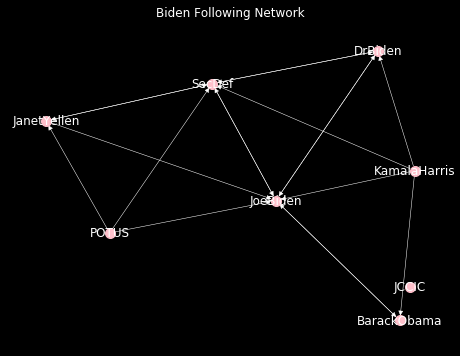

1

In [18]:
def draw_network_pos(G,pos,title_str):
    node_size = 100
    node_color = "pink"
    width = 0.5
    edge_color = "white"
    bg_color = "black"

    #2 points  drawing network with directed layout 
    fig = plt.figure(figsize= (8,6))
    plt.subplot(1,1,1)
    nx.draw(G, width=width,pos=pos ,node_color=node_color,
            edge_color=edge_color,node_size=node_size,
            connectionstyle='arc3',with_labels=True,font_color = 'white')
    plt.title(title_str,color = "white")
    fig.set_facecolor(bg_color)
    plt.show()    
    return 1

pos = nx.kamada_kawai_layout(G)
draw_network_pos(G,pos,"Biden Following Network")
